In [1]:
import sys
import os 
from pathlib import Path

BASE_DIR = os.getcwd()
sys.path.append(str(Path(BASE_DIR).resolve().parents[0]))

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.data.data_loader import load_raw_data, explore_data
from src.data.feature_engineer import process_impedance_features
from src.data.data_preprocess import classify_capacity_bins
from src.config.load_config import load_config


In [2]:
config = load_config(str(Path(BASE_DIR).resolve().parents[0]/"configs"/"config.yaml"))
csv_file_path = config['paths']['dataset']

In [6]:
data = load_raw_data(str(csv_file_path))
processed_data = classify_capacity_bins(data)
features_df = process_impedance_features(processed_data)


=== CAPACITY CLASSIFICATION ===
    Capacity (mAh)                                    
             count     mean     std      min       max
Bin                                                   
1                2  6522.40    0.00  6522.40   6522.40
2               17  7220.91  123.51  7040.00   7367.71
3               40  7702.60  148.02  7484.09   7946.64
4               59  8285.36  132.28  8095.92   8478.28
5              349  9346.92  458.10  8508.94  10027.02


(array([0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035, 0.004 ,
        0.0045]),
 [Text(0.0005, 0, '0.0005'),
  Text(0.001, 0, '0.0010'),
  Text(0.0015, 0, '0.0015'),
  Text(0.002, 0, '0.0020'),
  Text(0.0025, 0, '0.0025'),
  Text(0.003, 0, '0.0030'),
  Text(0.0035, 0, '0.0035'),
  Text(0.004, 0, '0.0040'),
  Text(0.0045000000000000005, 0, '0.0045')])

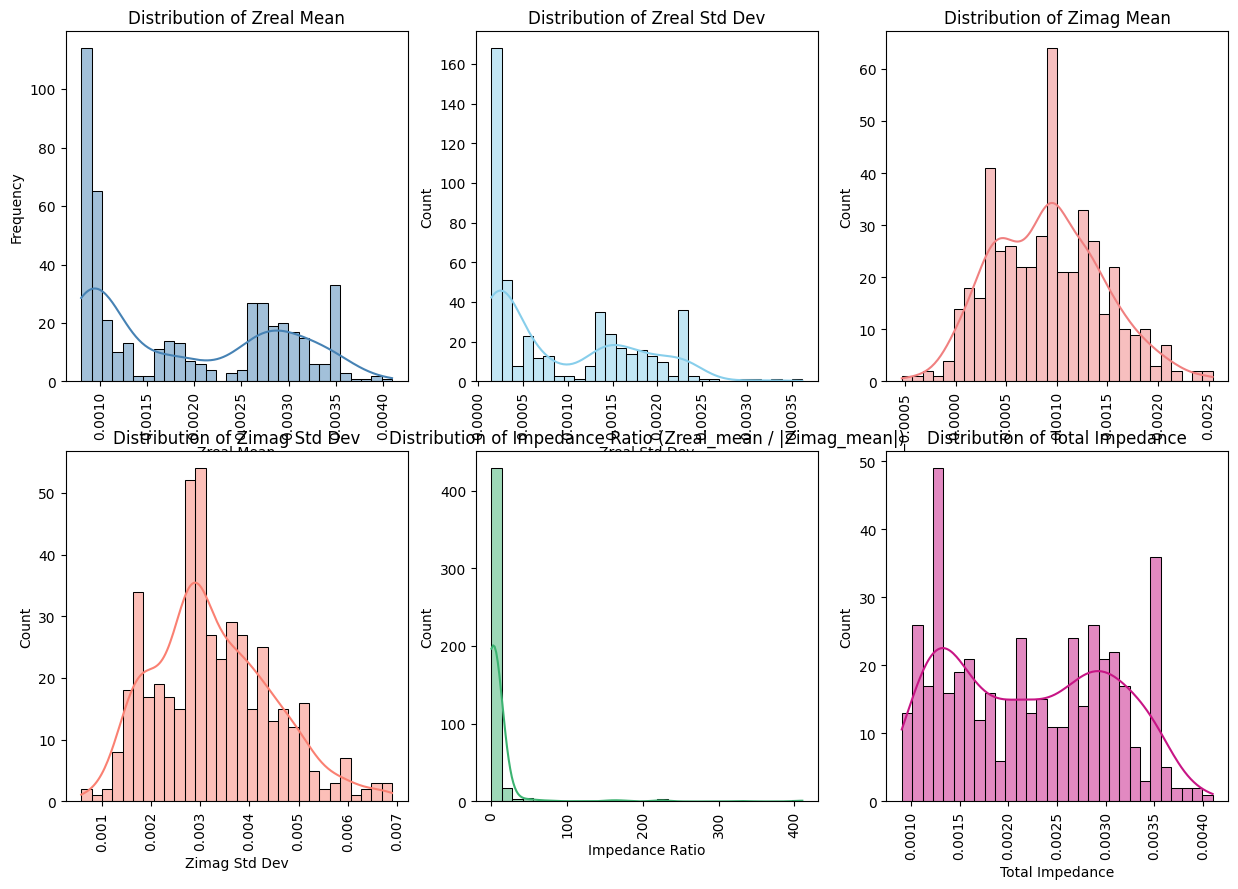

In [ ]:
plt.figure(figsize=(15, 12))

# Zreal_mean distribution
plt.subplot(2, 3, 1)
sns.histplot(features_df['Zreal_mean'], bins=30, kde=True, color='steelblue')
plt.title("Distribution of Zreal Mean")
plt.xlabel("Zreal Mean")
plt.ylabel("Frequency")
plt.xticks(rotation=90)

# Zreal_std distribution
plt.subplot(2, 3, 2)
sns.histplot(features_df['Zreal_std'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Zreal Std Dev")
plt.xlabel("Zreal Std Dev")
plt.xticks(rotation=90)

# Zimag_mean distribution
plt.subplot(2, 3, 3)
sns.histplot(features_df['Zimag_mean'], bins=30, kde=True, color='lightcoral')
plt.title("Distribution of Zimag Mean")
plt.xlabel("Zimag Mean")
plt.xticks(rotation=90)

# Zimag_std distribution
plt.subplot(2, 3, 4)
sns.histplot(features_df['Zimag_std'], bins=30, kde=True, color='salmon')
plt.title("Distribution of Zimag Std Dev")
plt.xlabel("Zimag Std Dev")
plt.xticks(rotation=90)

# Impedance_ratio distribution
plt.subplot(2, 3, 5)
sns.histplot(features_df['Impedance_ratio'], bins=30, kde=True, color='mediumseagreen')
plt.title("Distribution of Impedance Ratio (Zreal_mean / |Zimag_mean|)")
plt.xlabel("Impedance Ratio")
plt.xticks(rotation=90)

# Total_impedance distribution
plt.subplot(2, 3, 6)
sns.histplot(features_df['Total_impedance'], bins=30, kde=True, color='mediumvioletred')
plt.title("Distribution of Total Impedance")
plt.xlabel("Total Impedance")
plt.xticks(rotation=90)